In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

2023-07-06 15:38:39.255521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import grpc
import tritonclient.grpc as grpcclient
import tensorflow as tf


In [6]:
triton_server_url = "<pl"  
triton_client = grpcclient.InferenceServerClient(url=triton_server_url)


In [7]:
model_name = "mnist_model" 
model_version = "1"  


In [8]:
model_metadata = triton_client.get_model_metadata(model_name=model_name, model_version=model_version)
model_config = triton_client.get_model_config(model_name=model_name, model_version=model_version)

In [9]:
model_inputs = model_metadata.inputs
model_outputs = model_metadata.outputs
input_name = model_inputs[0].name
output_name = model_outputs[0].name
input_dtype = model_inputs[0].datatype
output_dtype = model_outputs[0].datatype
input_shape = list(model_inputs[0].shape)
output_shape = model_outputs[0].shape

In [10]:
img = plt.imread("img_1.jpg")

In [11]:
img.shape

(28, 28)

In [12]:
# mnist = tf.keras.datasets.mnist

In [13]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

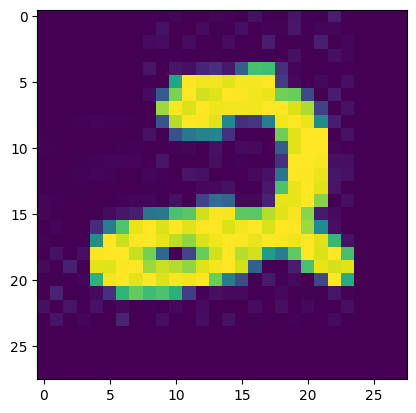

In [14]:
plt.imshow(img)

In [17]:
input_data = np.expand_dims(img, axis=0)
input_data = np.reshape(input_data, (-1, 28, 28, 1))
input_data.shape

(1, 28, 28, 1)

In [18]:
batch_size = 1

In [19]:
input_shape[0] = batch_size  # Update the batch size dimension
request = grpcclient.InferInput(input_name, input_shape, input_dtype)
request.set_data_from_numpy(input_data.astype(np.float32))

In [20]:
input_shape

[1, 28, 28, 1]

In [21]:
response = triton_client.infer(model_name=model_name, inputs=[request])

In [22]:
output_data = response.as_numpy(output_name)

In [23]:
print(output_data)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
